In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_excel("INPUT SET 3.xlsx")

In [3]:
# splitting the remaining data in training data and validation data. 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, shuffle = False)

In [4]:
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

In [5]:
# Scaling the data using MinMax Scaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.drop(["Y"],axis=1).values)
Y_train = scaler.fit_transform(df_train["Y"].values.reshape(-1,1))
X_test = scaler.fit_transform(df_test.drop(["Y"],axis=1).values)
Y_test = scaler.fit_transform(df_test["Y"].values.reshape(-1,1))

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(940, 4)
(940, 1)
(404, 4)
(404, 1)


In [7]:
# function to denormalise the predicted values.
def denormalize(df,norm_data):
    df = df["Y"].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    
    return new

In [8]:
# definition for svr model (primal problem using linear kernel) using tensorflow.

In [9]:
# variables required for model creation.
x_data = tf.placeholder(shape=[None, 4], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)
W = tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [10]:
# output equation of linear regression model i.e. y_predicted = X_data.W + b
y_predicted = tf.add(tf.matmul(x_data, W), b)

In [11]:
# loss function = mean(max(0, |y_predicted-y_target|-E))
epsilon = tf.constant([0.01])
cost = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(tf.subtract(y_predicted, y_target)), epsilon)))

In [12]:
# Using Gradient Descent as the optimization algorithm.
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

W0121 13:23:10.199058  5248 deprecation.py:323] From c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
train_loss = []
test_loss = [] 
batch_size = 200

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Loop for training the SVR primal model.

for i in range(100):
        
    train_indices = np.random.choice(len(X_train), batch_size, replace=False)
    x = X_train[train_indices]
    y = Y_train[train_indices]
        
    for j in range(x.shape[0]):
        
        sess.run([cost,train],feed_dict={x_data:x[j,:].reshape(1,4), y_target:y[j].reshape(1,1)})
            
    train_loss.append(sess.run(cost, feed_dict={x_data:X_train,y_target:Y_train}))
    test_loss.append(sess.run(cost, feed_dict={x_data:X_test,y_target:Y_test}))
    print('Epoch :',i,'Training Cost :',train_loss[i])
    print(sess.run(W).reshape(1,4))
        
# end of for loop for training the model. 

print('Test Data Cost :',sess.run(cost, feed_dict={x_data:X_test,y_target:Y_test}))

Epoch : 0 Training Cost : 0.21947703
[[-1.4583783   1.6778897  -0.51432514  0.36243415]]
Epoch : 1 Training Cost : 0.17955355
[[-1.3475386   1.6075152  -0.4974361   0.43488264]]
Epoch : 2 Training Cost : 0.169353
[[-1.2455289   1.5448982  -0.46949765  0.4975444 ]]
Epoch : 3 Training Cost : 0.15949522
[[-1.1779534   1.4141084  -0.48970377  0.5720884 ]]
Epoch : 4 Training Cost : 0.14764771
[[-1.0936582   1.3387722  -0.49484262  0.5491742 ]]
Epoch : 5 Training Cost : 0.14159065
[[-0.99816406  1.2757442  -0.48304233  0.5264039 ]]
Epoch : 6 Training Cost : 0.1331402
[[-0.8636702   1.2458034  -0.42458653  0.5780264 ]]
Epoch : 7 Training Cost : 0.12903565
[[-0.8067747   1.1367917  -0.40133733  0.6224692 ]]
Epoch : 8 Training Cost : 0.12021515
[[-0.71339375  1.068163   -0.40455648  0.59341115]]
Epoch : 9 Training Cost : 0.11343722
[[-0.62977713  0.9825553  -0.39039502  0.5917046 ]]
Epoch : 10 Training Cost : 0.106020525
[[-0.5875332   0.89711833 -0.3593332   0.5898598 ]]
Epoch : 11 Training Co

Epoch : 93 Training Cost : 0.0655704
[[-0.0387428  -0.00787928  0.07601084  0.52166736]]
Epoch : 94 Training Cost : 0.053110547
[[-0.05447014  0.01162924  0.10814996  0.5512937 ]]
Epoch : 95 Training Cost : 0.054472618
[[-0.03860442  0.00854573  0.11981077  0.5578303 ]]
Epoch : 96 Training Cost : 0.0590037
[[-0.03665166  0.00802224  0.12093778  0.5381537 ]]
Epoch : 97 Training Cost : 0.053467453
[[-0.05410386 -0.04102681  0.06471518  0.5072395 ]]
Epoch : 98 Training Cost : 0.057490617
[[-4.0726598e-02  3.8832019e-04  9.5963605e-02  5.2666920e-01]]
Epoch : 99 Training Cost : 0.05372344
[[-0.0324562  -0.01874924  0.08200543  0.52267116]]
Test Data Cost : 0.061583646


In [16]:
# stores the predicted value for test data using trained SVR model.
pred = sess.run(y_predicted, feed_dict={x_data:X_test}) # output comes between 0 to 1.

In [17]:
# denormalizing our predicted value.
y_test = denormalize(df_test, Y_test)
pred = denormalize(df_test, pred)

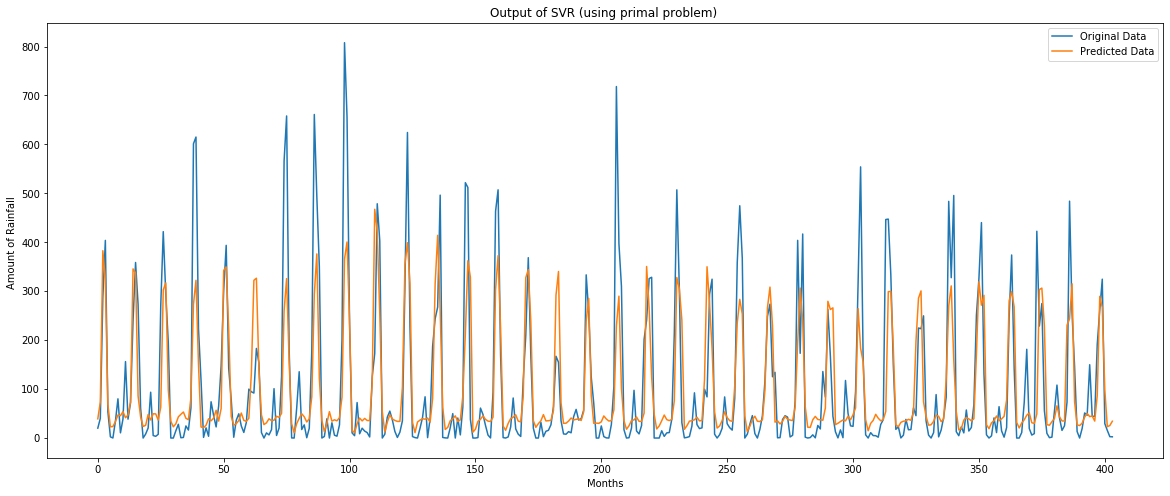

In [18]:
# plot showing difference between actual test data and predicted test data.
plt.figure(figsize=[20,8])
plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
plt.plot(range(y_test.shape[0]),pred,label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall ')
plt.xlabel('Months')
plt.title('Output of SVR (using primal problem) ')
plt.show()

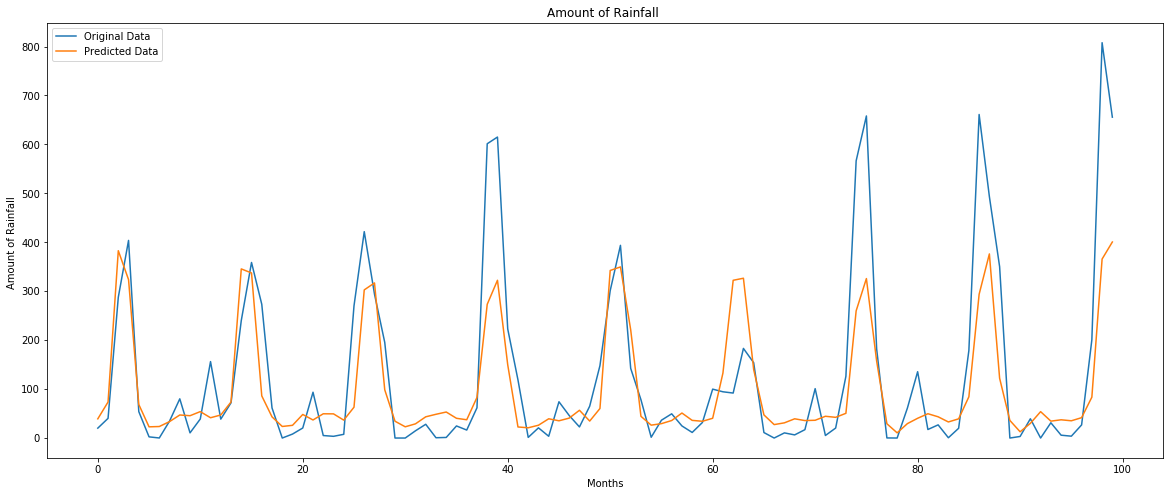

In [19]:
# plot showing difference between actual test data and predicted test data for first 100 samples.
plt.figure(figsize=[20,8])
plt.plot(range(100),y_test[:100],label="Original Data")
plt.plot(range(100),pred[:100],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall ')
plt.xlabel('Months')
plt.title('Amount of Rainfall ')
plt.show()

In [20]:
print("MAE : ", np.mean(abs(y_test-pred)))

MAE :  57.3964596304563


In [21]:
print("RMSE : ", np.sqrt(np.mean(np.square(y_test-pred))))

RMSE :  95.81839093763078
